<a href="https://colab.research.google.com/github/dahlia52/BOAZ_Engineering/blob/main/Kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kafka

#### Kafka

**Kafka**
- 링크드인에서 개발한 오픈소스 **분산 이벤트 스트리밍** 플랫폼

  *이벤트 스트리밍 : 데이터베이스, 센서, 모바일기기, 애플리케이션 등과 같은 곳에서 발생하는 데이터를 event stream 형태로 저장해서 나중에 검색할 수 있도록 하는 것. 즉, 발생하는 데이터를 실시간으로 처리하고, 필요에 따라 데이터가 또 다른 target 시스템으로 event stream 을 라우팅 해주는 것

- 비동기 처리를 위한 PUB/SUB 기반의 메시징 큐

  *PUB/SUB : 발신자 Publish, 수신자 Subscribe로 발신자는 데이터 전송을 하고, 수신자는 원하는 메시지만 구독하는 방식

- 이벤트 스트림을 지속적으로 **발행(publish-write), 구독(subscribe-read)** 함.

- 이벤트 스트림을 원하는 만큼 내구성 있고 안정적으로 **저장(store)**함. 

- Forturn 100 기업 중 80% 이상의 기업이 카프카 사용

#### Kafka의 필요성

기존 아키텍처 (2011년 기준 링크드인의 아키텍처 데이터 파이프라인 구조)

**Point to Point 방식 (1:1)**

- 단방향 통신을 통해 소스 애플리케이션에서 타깃 애플리케이션으로 연동하는 소스코드를 작성하는 식으로 운영함.

- 이러한 형태는 아키텍처가 거대해지고, 소스 애플리케이션과 타깃 애플리케이션을 연결하는 파이프라인 개수가 많아지면서 문제 발생

- 파이프라인 관리가 어려움. 특정 부분을 수정해야할 때, 앞단부터 다 수정해야 할 수 있음.

- 시간 트랜잭션 처리와 비동기 처리가 동시에 이루어지지만 통합된 전송 영역의 부재로 복잡도가 증가

- 소스코드/ 버전 관리 이슈

- 타깃 애플리케이션 장애 발생 시 소스 애플리케이션에 영향

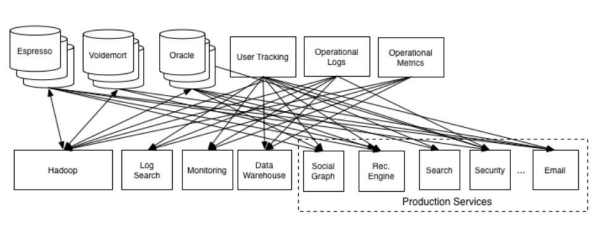

이후 파이프라인 구조 (Apache Kafka 탄생)

**중앙 집중화 형태**

- 중앙에 위치하여 각각의 애플리케이션끼리 연결되어 있는데 이러한 중앙 집중화 형태는 데이터 관리에 용이함.

- 기존에 데이터 스토어 백엔드 관리와 백엔드에 따른 포맷, 별도의 앱 개발을 해야했는데 이젠 카프카에만 데이터를 전달하면 필요한 곳에서 각자 가져갈 수 있도록 변경됨.

- 소스 애플리케이션과 타깃 애플리케이션 사이의 의존도를 최소화하여 커플링을 완화함.

  - 기존의 1:1 매칭의 데이터 파이프라인은 커플링으로 인해 한쪽 이슈가 다른 한쪽 애플리케이션에 영향을 미쳤는데, 카프카는 이러한 의존도를 줄임.

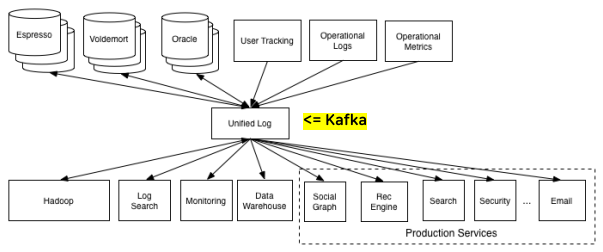

#### Kafka의 기본 구조

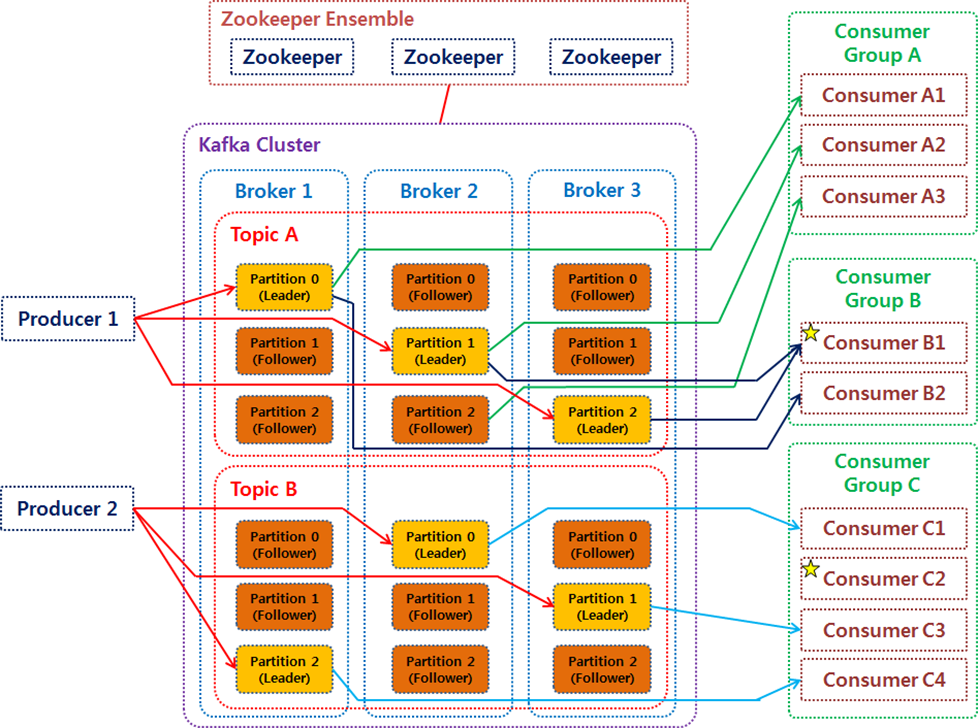

#### Kafka 구성요소

- **브로커 (Broker)** : 카프카 서버. 브로커 내부에는 토픽을 생성해서 사용
- **프로듀서 (Producer)** : 데이터를 주는 쪽
- **컨슈머 (Consumer)** : 데이터 받는 쪽 (처리 속도 향상을 위해 개별 컨슈머 인스턴스를 하나로 묶어 컨슈머 그룹으로 관리하기도 함)

- **토픽 (Topic)** : 메시지(데이터) 구분 단위로, 1개 이상의 파티션 소유
- **파티션 (Partition)** : 데이터 저장 공간으로, 토픽 내의 데이터 단위
- **레코드 (Record)** : 토픽의 파티션에 저장되는 데이터. 타임스탬프, 메시지 키, 메시지 값, 오프셋, 헤더로 구성됨.

- **카프카 클러스터 (Kafka Cluster)** : 메시지를 저장하는 저장소. 하나의 카프카 클러스터는 여러 개의 브로커로 구성됨. 
- **주키퍼 (Zookeeper)** : 카프카의 메타 데이터 관리 (최근에 제거하는 추세)

**브로커 (Broker)**

- 카프카 클라이언트와 **데이터를 주고받기 위해 사용하는 주체**로, 데이터를 **분산 저장**하여 장애 발생 시에도 안전하게 사용할 수 있게 도와주는 애플리케이션

- 하나의 서버에 한 개의 카프카 브로커 프로세스

- 일반적으로 3대 이상의 브로커 서버를 1개의 클러스터로 묶어서 운영

- 데이터 저장 : 브로커는 프로듀서가 요청한 토픽의 파티션에 데이터를 저장. 데이터는 파일시스템에 저장되며, 파일시스템 사용시 디스크 입출력 속도를 높이기 위해 페이지 캐시를 사용하여 속도 문제를 해결

- 토픽 : 카프카에서 데이터를 구분하기 위해 사용하는 단위
- 파티션 : 토픽은 1개 이상의 파티션을 소유함
- 레코드 : 파티션에 저장된 데이터

**파티션**

- **추가만 가능한 (append-only)** 파일 -> 파티션을 늘릴 수는 있지만, 줄일 수는 없음.

- 큐와 비슷한 구조로 FIFO처럼 프로듀서가 넣은 메시지는 파티션의 맨 뒤에 추가

- 카프카 병렬처리의 핵심으로 그룹으로 묶인 컨슈머들이 레코드를 병렬로 처리할 수 있도록 매칭됨. 컨슈머의 처리량이 한정된 상황이라면, 가장 좋은 방법은 컨슈머의 개수를 늘려 scale out함. (컨슈머 개수를 늘림과 동시에 파티션 개수도 늘리면 증가하기 때문)

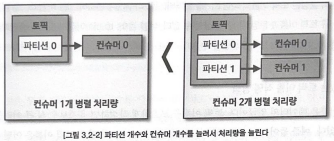

**토픽과 파티션** - **Producer**와 연결 측면

- 메시지 키와 값이 담긴 레코드는 토픽의 파티션에 저장됨.
  - key가 null인 경우 : 라운드 로빈 방식으로 할당
  - key가 있는 경우 : key의 해시값을 작성하여 존재하는 파티션 중 한 개로 할당 (즉, 메시지 키가 동일한 경우 동일한 파티션으로 전송됨)

- 파티셔너가 메시지 키와 파티션 할당을 담당함. 프로듀서가 레코드 데이터를 보내면 파티셔너를 통해 브로커에 전송됨. 

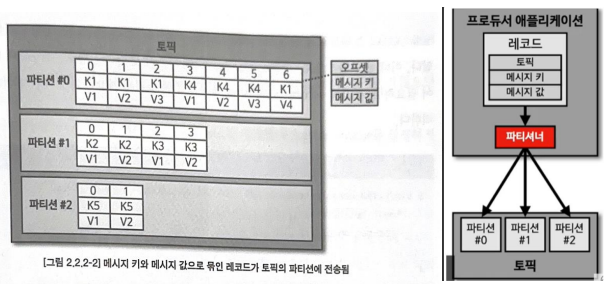

**토픽과 파티션** - Consumer와 연결 측면

- **Polling** : 컨슈머가 토픽 내부의 파티션에 저장된 데이터를 가져오는 것
  - 컨슈머가 데이터를 가져오더라도 토픽의 데이터는 삭제되지 않음.
  - 이러한 특징으로 여러 컨슈머 그룹들이 토픽의 데이터를 여러 번 가져갈 수 있음.
  - 메시지를 가져와 특정 데이터베이스에 저장하거나 또 다른 파이프라인에 전달

- **오프켓 커밋** : 컨슈머 그룹은 토픽이 특정 파티션으로부터 데이터를 가져가서 처리하고 이 파티션의 어느 레코드까지 가져갔는지 확인하기 위한 오프셋 커밋
  - 커밋 : 컨슈머가 특정 레코드까지 처리를 완료했다고 레코드의 오프셋 번호를 카프카 브로커에 저장하는 것
  - 오프셋(offset) : 파티션에 있는 데이터의 번호. 컨슈머가 데이터를 어느 지점까지 읽었는지 확인하는 용도로 사용
  - 커밋한 오프셋은 _consumer_offsets 이름의 내부 토픽에 저장됨. 
  - 컨슈머의 실행이 중지되면 중지되었던 시점을 시작 위치로 다시 복구하여 데이터를 처리할 수 있음.

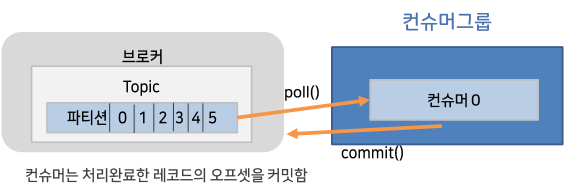

**데이터 복제 (Kafka Replication)**

- **장애 허용 시스템 (fault tolerant system)**으로 동작하도록 하는 원동력으로, 카프카 복제는 **파티션 단위**로 이뤄짐.

- 복제된 파티션 구분
  - **리더** : 프로듀서와 컨슈머와 직접 통신하는 파티션
  - **팔로워** : 나머지 복제 데이터를 갖고 있는 파티션

  - 팔로워 파티션들은 리더 파티션의 오프셋을 확인하여 현재 자신이 가지고 있는 오프셋과 차이나는 경우 리더 파티션으로부터 데이터를 가져와서 자신의 파티션에 저장

  - 리더 파티션이 있는 브로커에서 장애가 발생하여 리더 파티션이 동작하지 않는 상태라면, 팔로워 파티션 중 하나가 리더 파티션의 지위를 넘겨받음. 

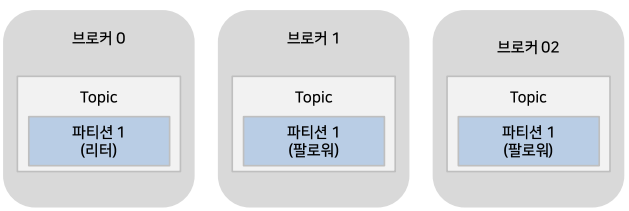

- 파티션 복제 개수
  - 토픽 생성 시 설정 가능 (최솟값 1 ~ 최댓값 브로커 개수)

- 토픽 생성 시 파티션 고려 사항
  - 데이터 처리량
  - 메시지 키 사용 여부
  - 브로커, 컨슈머 영향도

- 파티션 개수 공식 : 컨슈머 전체 데이터 처리량이 프로듀서 데이터 처리량보다 많아야 함. 

  > 프로듀서 전송 데이터 량 < 컨슈머 데이터 처리량 x 파티션 개수

**컨트롤러**

- 클러스터의 다수 브로커 중 한 대가 컨트롤러 역할을 함.

- 컨트롤러는 다른 브로커들의 상태를 체크하고 브로커가 클러스터에서 빠지는 경우 해당 브로커에 존재하는 리더 파티션을 재분배함.

- 만약 컨트롤러 역할을 하는 브로커에 장애가 생기면 다른 브로커가 컨트롤러 역할을 함. 

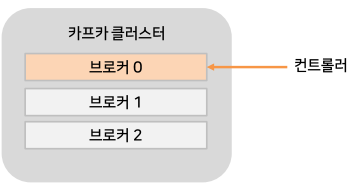

## 실습

#### 설치 및 접속

- docker 환경 확인 : docker 설치여부와 docker-compose가 버전2인지 확인

In [ ]:
docker --version
docker-compose --version

- docker-compose.yml 작성하기

In [ ]:
notepad docker-compose.yml

In [ ]:
version: '2'
services:
  zookeeper:
    image: wurstmeister/zookeeper
    container_name: zookeeper
    ports:
      - "2181:2181"
  kafka:
    image: wurstmeister/kafka
    container_name: kafka
    ports:
      - "9092:9092"
    environment:
      KAFKA_ADVERTISED_HOST_NAME: 127.0.0.1
      KAFKA_ZOOKEEPER_CONNECT: zookeeper:2181
    volumes:
      - /var/run/docker.sock:/var/run/docker.sock

- docker-compose  실행하기 : d옵션으로 백그라운드 실행

In [ ]:
docker-compose up -d

- 컨테이너가 잘 실행됐는지 확인하기

In [ ]:
docker ps

- kafka 컨테이너에 접속하기

In [ ]:
docker container exec -it kafka bash

- kafka 설정 파일 확인해보기

In [ ]:
cd /opt/kafka_2.13-2.8.1/bin
ls

#### 토픽 생성하기

- kafka-topics.sh를 통해 토픽 관련 명령 실행

  create 옵션을 사용해 helloboaz 이름의 토픽을 생성


In [ ]:
kafka-topics.sh --create --topic helloboaz --bootstrap-server localhost:9092 --replication-factor 1 --partitions 1

In [ ]:
# 설명
kafka-topics.sh 
	--create
	--topic helloboaz #[필수] 토픽 이름 지정 
	--bootstrap-server localhost:9092 # [필수] 토픽을 생성할 카프카 클러스터의 브로커들의 ip:port 입력
	--replication-factor 1 # 토픽의 파티션 복제할 개수 (1은 사용하지 않겠다는 의미)
	--partitions 1 # 파티션 개수 지정 (최소는 1개. 만약 옵션을 사용하지 않으면, 
					#카프카 브로커 설정 파일 (config/server.properties)에 있는 num.partitions 옵션값에 따라 생성됨

# 토픽 생성 시 토픽 이름과 카프카 브로커 정보만으로도 생성가능

#### 토픽 조회하기

- 토픽 이름 목록 조회

In [ ]:
kafka-topics.sh --list --bootstrap-server localhost:9092

In [ ]:
# 설명
kafka-topics.sh 
--list
--bootstrap-server localhost:9092 # 조회하고자 하는 브로커 정보를 입력

- 토픽 상세 출력

  토픽과, 파티션, 리더인 브로커 번호, 복제된 브로커 번호 등이 나옴.

In [ ]:
kafka-topics.sh --bootstrap-server localhost:9092 --topic helloboaz --describe

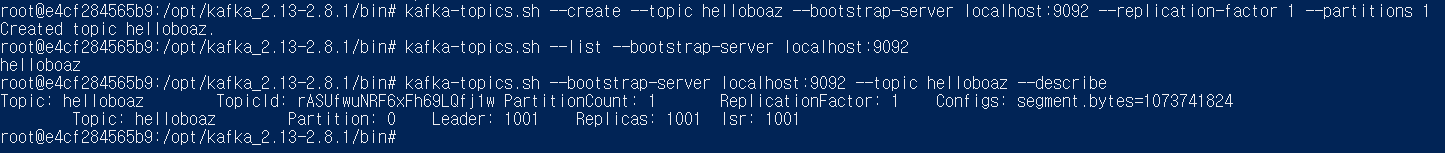

#### 프로듀서 실행하기

- helloboaz 토픽에 메시지 키와 값으로 이뤄진 데이터를 넣어 토픽의 파티션 안에 레코드 만들기
  
  kafka-console-producer.sh 를 이용하면 토픽에 데이터를 넣을 수 있음. 

In [ ]:
kafka-console-producer.sh --bootstrap-server localhost:9092 --topic helloboaz 

- consumer 실행하기

  다른 터미널 창에 쳐서 consumer를 실행하여 토픽에 데이터가 잘 들어갔는지 확인하기

In [ ]:
docker container exec -it kafka bash

In [ ]:
kafka-console-consumer.sh --bootstrap-server localhost:9092 --topic helloboaz --from-beginning

참고문헌)

BOAZ 엔지니어링 세션

아파카 카프카 애플리케이션 프로그래밍 with 자바 (최원영)